In [ ]:
NAME:RAJA SOHAIB FAWAD   ENROLL:01-136242-034
 ANALYSIS: Gas Pollutants (NO2 / SO2 / CO)

In [1]:
# uploading csv dataset file from locall drive.
from google.colab import files
uploaded = files.upload()


Saving AirQuality.csv to AirQuality.csv


In [2]:
#loading/mounting csv datset file in colab.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# Loading our dataset uploaded CSV
df = pd.read_csv("AirQuality.csv", sep=';')
print(df.shape)
df.head()

(9471, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [3]:
# 2) ensure Datetime exists (try common names)
if "Datetime" in df.columns:
    df["Datetime"] = pd.to_datetime(df["Datetime"], errors="coerce")
else:
    # try variations
    for cand in ["Date", "date", "Time", "time", "Date;Time", "date;time"]:
        if cand in df.columns:
            df["Datetime"] = pd.to_datetime(df[cand], errors="coerce")
            break
    # if still missing, try building from Date + Time
    if "Datetime" not in df.columns and ("Date" in df.columns and "Time" in df.columns):
        df["Datetime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str), errors="coerce")
# If still missing, use the first column as datetime attempt
if "Datetime" not in df.columns:
    df["Datetime"] = pd.to_datetime(df.iloc[:,0], errors="coerce")

In [4]:
# 3) show which gas columns we have
expected = ["CO(GT)","NO2(GT)","NOx(GT)","C6H6(GT)"]
found = [c for c in expected if c in df.columns]
print("Gas columns found:", found)


Gas columns found: ['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'C6H6(GT)']


In [5]:
# 4) make sure gas columns are numeric and -200 were handled earlier, but re-check
df.replace(-200, pd.NA, inplace=True)
for c in found:
    df[c] = pd.to_numeric(df[c], errors="coerce")

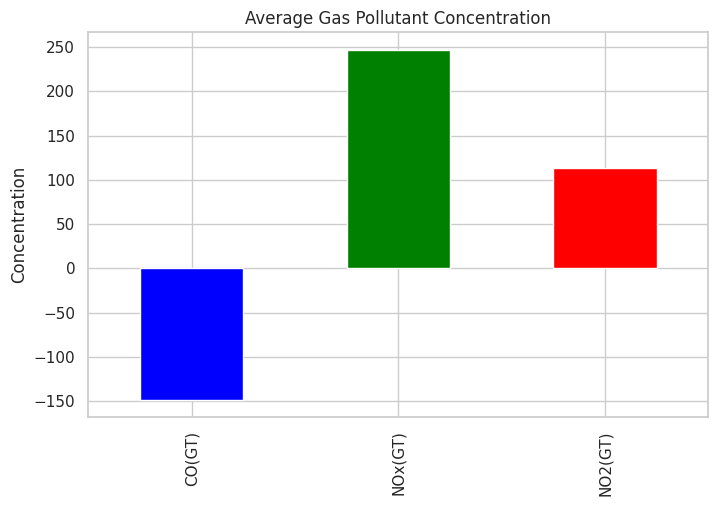

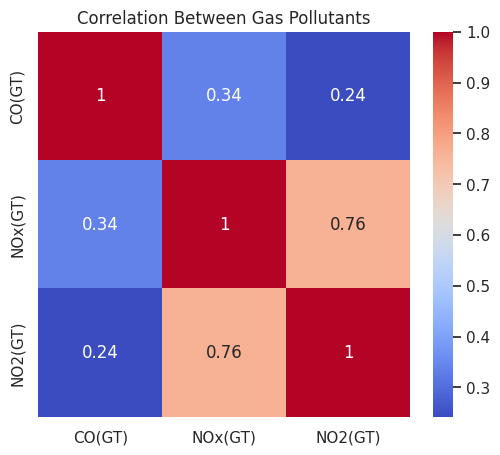

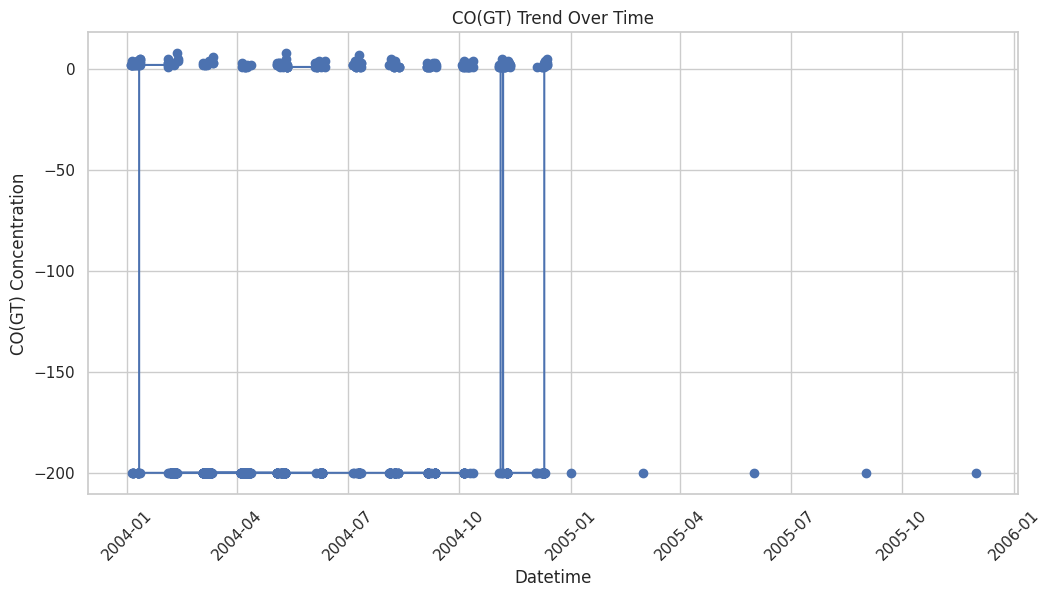

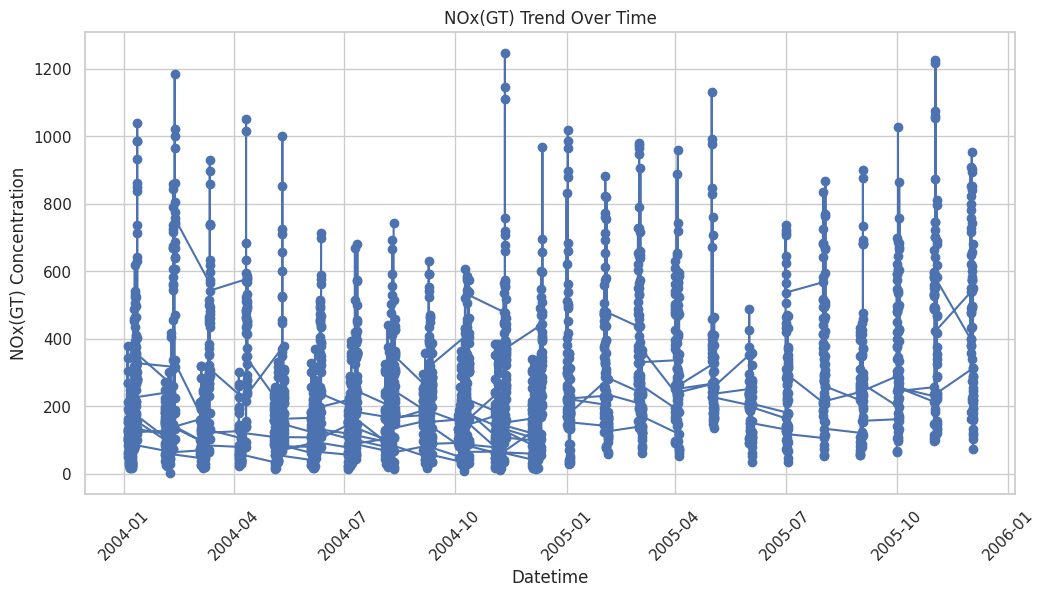

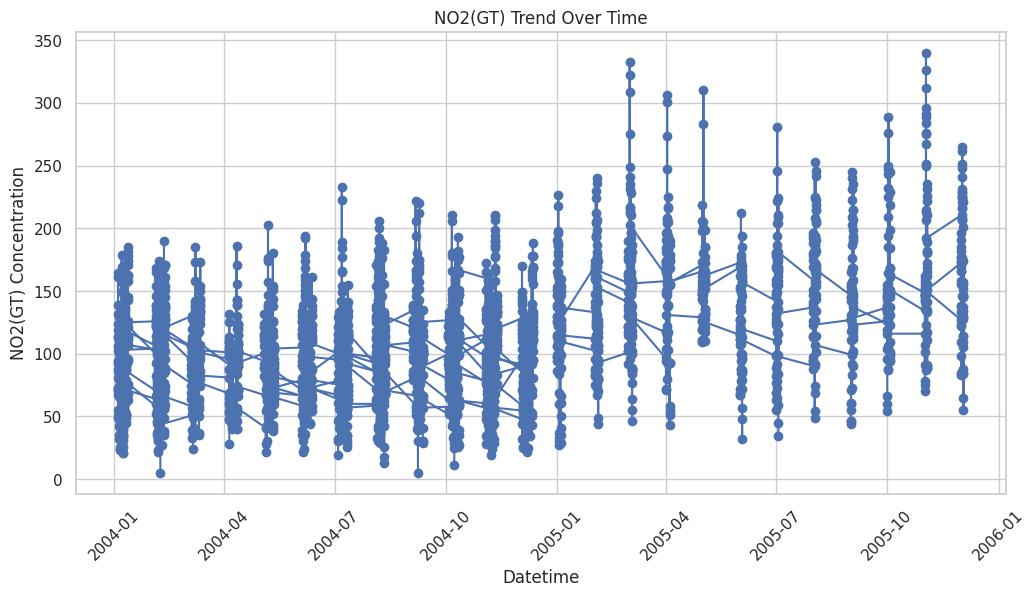

In [6]:


#Gas Pollutants Analysis


# Average Gas Concentrations
avg_gases = df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].mean()
avg_gases.plot(kind='bar', color=['blue','green','red'], figsize=(8,5))
plt.title("Average Gas Pollutant Concentration")
plt.ylabel("Concentration")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Gas Pollutants")
plt.show()

# Gas Trends Over Time
for gas in ['CO(GT)', 'NOx(GT)', 'NO2(GT)']:
    plt.figure(figsize=(12,6))
    plt.plot(df['Datetime'], df[gas], marker='o')
    plt.title(f"{gas} Trend Over Time")
    plt.xlabel("Datetime")
    plt.ylabel(f"{gas} Concentration")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [7]:

# 12) Save personal output and provide download link
out_name = "taimoor_gas_aqi_alerts.csv"
df.to_csv(out_name, index=False)
from google.colab import files
files.download(out_name)
print(f"\nSaved and started download: {out_name}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Saved and started download: taimoor_gas_aqi_alerts.csv
